# Triple Scoring Function - DisMult & MRR

In [1]:
# TODO register account for DAS5
# TODO Email Xander to move meeting
# TODO Double check code 
    # TODO check edge_index --> correct index for transactions?
    # TODO Check embeddings
    # TODO Manipulate Timestamp feature for edges 
# TODO DisMult 

In [2]:
import pickle
import torch
import time
import random
import datetime
import numpy as np
import pandas as pd
import networkx as nx
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
from functions import AMLDataPreprocessing
from pandas import Timestamp
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.loader import DataLoader
from torch_geometric.utils import negative_sampling, train_test_split_edges

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


![Screenshot 2024-05-22 at 18.37.26.png](<attachment:Screenshot 2024-05-22 at 18.37.26.png>)
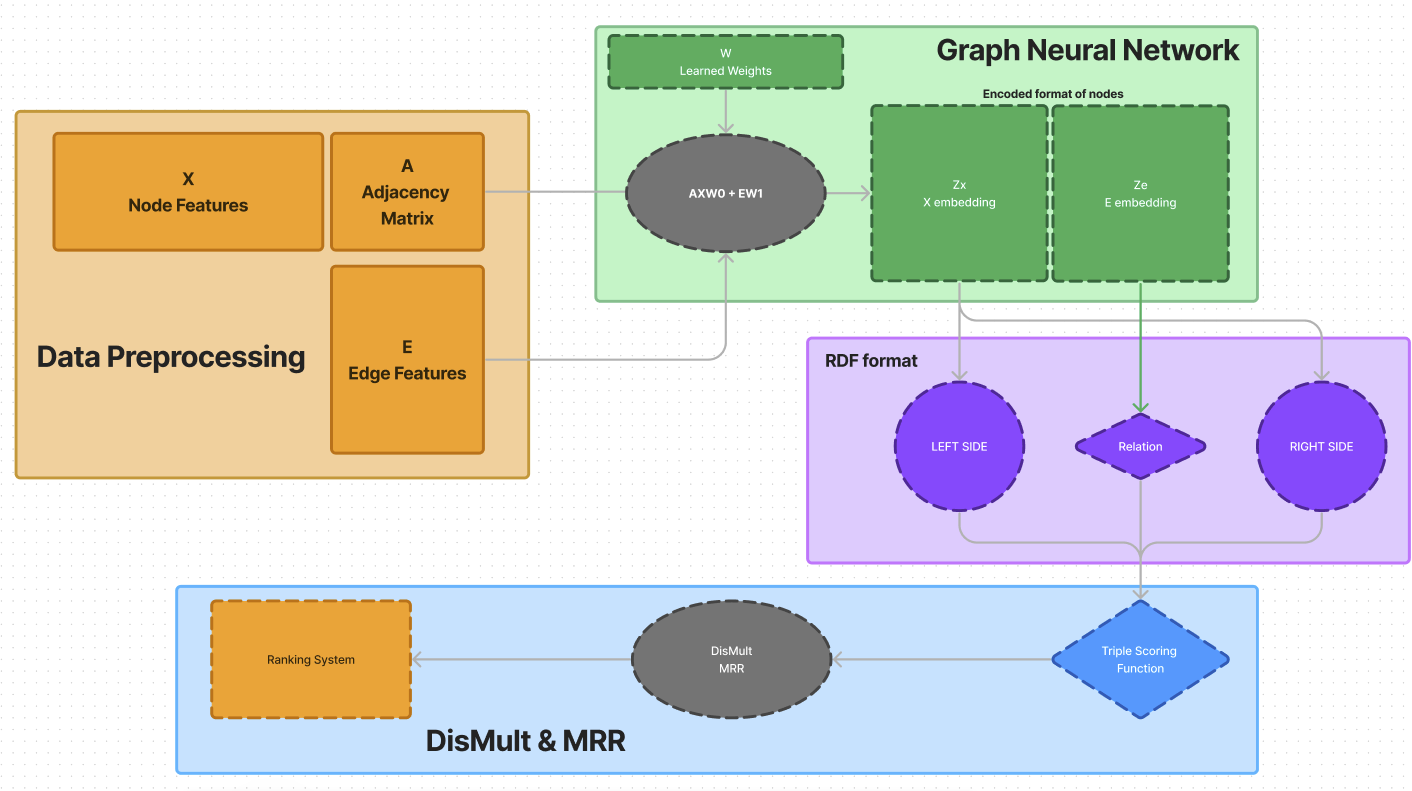

## Load data

In [3]:
with open("graph.pickle", "rb") as f:
    loaded_data = pickle.load(f)

labels = loaded_data["labels"]

In [4]:
import gzip

def print_rdf_triples(file_path):
    with gzip.open(file_path, 'rt') as f:
        for line in f:
            print(line.strip())

# Replace 'embeddings.nt.gz' with the actual file path
print_rdf_triples("embeddings.nt.gz")


<http://example.org/node/0> <http://example.org/ontology#connectedTo> <http://example.org/node/0> .
<http://example.org/node/0> <http://example.org/ontology#hasEmbedding> "-0.017987879 0.035605993 0.015844865 -0.026895138 -0.012528165 -0.018955987 -0.013677435 0.004657217 0.0022780087 0.0383246 -0.035561215 -0.022686224 0.010606004 -0.032880012 0.013346648" .
<http://example.org/node/0> <http://example.org/ontology#hasEmbedding> "-0.017987879 0.035605993 0.015844865 -0.026895138 -0.012528165 -0.018955987 -0.013677435 0.004657217 0.0022780087 0.0383246 -0.035561215 -0.022686224 0.010606004 -0.032880012 0.013346648" .
<http://example.org/relation/0> <http://example.org/ontology#hasEmbedding> "-19.251066 -19.480663 46.630272 15.628145 -23.920092 44.332394 15.1349125 27.477798 20.385468 -29.92798 57.302643 26.967865 54.983856 -23.950922 10.878825" .
<http://example.org/node/1> <http://example.org/ontology#connectedTo> <http://example.org/node/3734> .
<http://example.org/node/1> <http://exa

In [5]:
import gzip
import rdflib
# read the data from disk

g_train = rdflib.Graph()
g_test = rdflib.Graph()

with gzip.open(f'embeddings.nt.gz', 'r') as gf:
    g_train.parse(data = gf.read(), format = 'nt')
with gzip.open(f'embeddings.nt.gz', 'r') as gf:
    g_test.parse(data = gf.read(), format = 'nt')
# test whether reading the data was successful by printing 10 links from the train and test set each

print('TRAIN:', end='\n')
for h,r,t in list(g_train)[:10]:
    print(f'{h} {r} {t}', end='\n')

print('TEST:', end='\n')
for h,r,t in list(g_test)[:10]:
    print(f'{h} {r} {t}', end='\n')

TRAIN:
http://example.org/node/4152 http://example.org/ontology#hasEmbedding -0.5874118 0.10360705 0.112375945 -0.18366185 -0.47778428 -0.36577454 -0.17970727 0.17897461 0.5039917 1.0778534 0.7757766 -0.008979863 -0.06573157 0.19394642 -0.25612333
http://example.org/node/308 http://example.org/ontology#connectedTo http://example.org/node/3784
http://example.org/node/1323 http://example.org/ontology#connectedTo http://example.org/node/1323
http://example.org/node/3499 http://example.org/ontology#hasEmbedding -0.0002934072 0.0005272457 -9.234281e-05 -0.001468533 -0.00015353925 -0.00047363623 -0.0009634999 0.00073361007 0.00013576444 0.0011936948 -0.00018034373 -0.002223395 0.0002662474 -0.00093527505 -1.0965988e-05
http://example.org/node/1087 http://example.org/ontology#connectedTo http://example.org/node/1087
http://example.org/node/3656 http://example.org/ontology#connectedTo http://example.org/node/3656
http://example.org/relation/683 http://example.org/ontology#hasEmbedding -17.1024

In [6]:
import torch
import torch.nn as nn

seed = 42
torch.manual_seed(seed)  # allow for reproducability
## Data Preparation

i2n = set()  # integers to nodes map
i2r = set()  # integers to relation map

# your code here
# r2i = ...
# n2i = ...
# ...

num_nodes = len(i2n)
num_relations = len(i2r)

# convert the graphs to an integer-encoding tensor

data_train = torch.zeros((len(g_train), 3), dtype=int)
# ...

data_test = 


# Test your procedure.

print('TRAIN:', end='\n')
for triple in data_train[:10]:
    print(triple, end='\n')

print('TEST:', end='\n')
for triple in data_test[:10]:
    print(triple, end='\n')

class DistMult(nn.Module):
    def __init__(self, ...):
        """ DistMult
        """
        super().__init__()

        # your code here

    def forward(self, X:torch.Tensor):
        # your code here

model = DistMult(...)

samples = data_train[:10]
out = model(samples)

print(out)

def corrupt_triples(...):
    # your code here

    return data_corrupt

samples = data_train[:10]
print(f"original data:\n{samples}\n")

samples_corrupted = corrupt_triples(...)  # add your parameters
print(f"corrupted data:\n{samples_corrupted}")
## Mini Batching

### Task 3b: Creating batches
def mk_batches(...) -> list:
    # your code here
    return batchesfor i, batch in enumerate(mk_batches(...), 1):  # add your parameters
    print(f"batch {i}: {batch}")
## Training and testing
### Task 4a: The training loop
# set hyperparameters
learning_rate = ...
num_epoch = 50
corrupt_probability = ...
batch_size = ...

# set optimizer and loss function
optimizer = ...
loss_function = ...

num_train = data_train.shape[0]
for epoch in range(1, num_epoch+1):
    print(f'Epoch {epoch:3d} - ', end='')

    # create batches
    batches = ...         # your code here
    num_batches = len(batches)

    batch_loss_tensor = torch.zeros(num_batches, dtype=torch.float32)
    for batch_id, batch in enumerate(batches):
        data_batch = ...
        num_samples = data_batch.shape[0]

        # create negative samples by randomly assigning random node indices in the object position
        data_batch_corrupt = ...
        ...
 
        # create labels; positive samples are 1, negative 0
        Y = ... 

        # allow model parameters to be learned   
        model.train()         

        # compute scores for positive and negative triples  
        Y_hat = ...
        
        # compute loss
        batch_loss = ...
        
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        batch_loss = float(batch_loss)  # release memory of computation graph
        batch_loss_tensor[batch_id] = batch_loss

    print(f'loss on train set: {batch_loss_tensor.mean():0.4f}')

SyntaxError: invalid syntax (773737936.py, line 24)

In [7]:
import gzip
import torch
import torch.nn as nn
import torch.nn.functional as F


def process_rdf(file_path):
    edges = []
    embeddings = []
    node_set = set()
    relation_set = set()

    with gzip.open(file_path, 'rt') as f:
        new_list = []
        counter = 0
        for line in f:
            if 'connectedTo' in line:  # edge
                edges.append(line.strip())
                parts = line.strip().split()
                head = parts[0].strip('<>').split('/')[-1]
                tail = parts[2].strip('<>').split('/')[-1]

                node_set.add(head)
                node_set.add(tail)
            elif 'hasEmbedding' in line:  # embeddings
                node_embedding = [float(val) for val in line.split('"')[1].split()]
                # node_embedding = torch.tensor(node_embedding)
                new_list.append(node_embedding)
                counter += 1
                if counter == 3:
                    embeddings.append(new_list)
                    new_list = []
                    counter = 0
    return edges, embeddings, node_set

# Test the function
edges, embeddings, node_set = process_rdf("embeddings.nt.gz")
# print("Edges:")
# print(edges)
# print("Edge Embeddings:")
# print(len(embeddings))
# print("Number of Nodes:")
# print(len(node_set))

# Prepare data for training
heads = []
relations = []
tails = []

for i in range(len(embeddings)):
    head = embeddings[i][0]
    tail = embeddings[i][1]
    relation = embeddings[i][2]
    
    heads.append(head)
    tails.append(tail)
    relations.append(relation)

# Stack the tensors for batch processing
heads = torch.tensor(heads, dtype=torch.float32, requires_grad=True)
relations = torch.tensor(relations, dtype=torch.float32, requires_grad=True)
tails = torch.tensor(tails, dtype=torch.float32, requires_grad=True)

print(heads.size())
print(tails.size())
print(relations.size())

# MODEL
class DisMult(nn.Module):
    def __init__(self, embedding_dim, threshold=0.5):
        super(DisMult, self).__init__()
        self.embedding_dim = embedding_dim
        self.threshold = threshold
        self.dummy_parameter = nn.Parameter(torch.Tensor(1))  # Just a placeholder

    def forward(self, head_embeddings, relation_embeddings, tail_embeddings):
        head_embeddings = F.normalize(head_embeddings, p=2, dim=-1)
        relation_embeddings = F.normalize(relation_embeddings, p=2, dim=-1)
        tail_embeddings = F.normalize(tail_embeddings, p=2, dim=-1)

        scores = torch.sum(head_embeddings * relation_embeddings * tail_embeddings, dim=-1)
        scores = torch.sigmoid(scores)  # Apply sigmoid function
        binary_predictions = (scores > self.threshold).float()  # Apply threshold

        return scores, binary_predictions


# Get the number of nodes and relations from the data
num_nodes = len(node_set)
num_relations = len(embeddings)
embedding_dim = heads[0].size(0)  # Dimensionality of embeddings

print(num_nodes)
print(num_relations)
print(embedding_dim)

# Initialize model
# Example usage
model = DisMult(embedding_dim=15)
# labels = torch.tensor(labels, dtype=torch.float32, requires_grad=False)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    # Inside the training loop
    optimizer.zero_grad()
    output_scores, output_binary = model(heads, relations, tails)

    print(output_binary)
    print(labels)

    loss = criterion(output_scores, labels)
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


torch.Size([4999, 15])
torch.Size([4999, 15])
torch.Size([4999, 15])
4188
4999
15
tensor([1., 0., 1.,  ..., 1., 1., 1.])
tensor([0., 0., 0.,  ..., 0., 0., 0.])
Epoch [1/10], Loss: 0.7229
tensor([1., 0., 1.,  ..., 1., 1., 1.])
tensor([0., 0., 0.,  ..., 0., 0., 0.])
Epoch [2/10], Loss: 0.7229
tensor([1., 0., 1.,  ..., 1., 1., 1.])
tensor([0., 0., 0.,  ..., 0., 0., 0.])
Epoch [3/10], Loss: 0.7229
tensor([1., 0., 1.,  ..., 1., 1., 1.])
tensor([0., 0., 0.,  ..., 0., 0., 0.])
Epoch [4/10], Loss: 0.7229
tensor([1., 0., 1.,  ..., 1., 1., 1.])
tensor([0., 0., 0.,  ..., 0., 0., 0.])
Epoch [5/10], Loss: 0.7229
tensor([1., 0., 1.,  ..., 1., 1., 1.])
tensor([0., 0., 0.,  ..., 0., 0., 0.])
Epoch [6/10], Loss: 0.7229
tensor([1., 0., 1.,  ..., 1., 1., 1.])
tensor([0., 0., 0.,  ..., 0., 0., 0.])
Epoch [7/10], Loss: 0.7229
tensor([1., 0., 1.,  ..., 1., 1., 1.])
tensor([0., 0., 0.,  ..., 0., 0., 0.])
Epoch [8/10], Loss: 0.7229
tensor([1., 0., 1.,  ..., 1., 1., 1.])
tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class Dismult(nn.Module):
    def __init__(self, embedding_size):
        super(Dismult, self).__init__()
        self.embedding_size = embedding_size
        self.linear = nn.Linear(embedding_size * 3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, head, relation, tail):
        combined = torch.cat((head, relation, tail), dim=1)
        out = self.linear(combined)
        score = self.sigmoid(out)
        return score

def calculate_mrr(ranks):
    reciprocal_ranks = 1.0 / ranks
    return torch.mean(reciprocal_ranks)

# Instantiate model
model = Dismult(embedding_size=15)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    scores = model(heads, relations, tails)

    # print(scores.size())
    # print(scores.squeeze().size())

    loss = criterion(scores.squeeze(), labels)
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# After training, you can use the model to make predictions


Epoch [1/10000], Loss: 1.138814091682434
Epoch [2/10000], Loss: 1.1054506301879883
Epoch [3/10000], Loss: 1.067277193069458
Epoch [4/10000], Loss: 1.02511727809906
Epoch [5/10000], Loss: 0.9806332588195801
Epoch [6/10000], Loss: 0.9361532330513
Epoch [7/10000], Loss: 0.8942050933837891
Epoch [8/10000], Loss: 0.8568885922431946
Epoch [9/10000], Loss: 0.8253929018974304
Epoch [10/10000], Loss: 0.7999010682106018
Epoch [11/10000], Loss: 0.7798447012901306
Epoch [12/10000], Loss: 0.764295756816864
Epoch [13/10000], Loss: 0.7522861957550049
Epoch [14/10000], Loss: 0.7429744601249695
Epoch [15/10000], Loss: 0.735694169998169
Epoch [16/10000], Loss: 0.7299413084983826
Epoch [17/10000], Loss: 0.7253431081771851
Epoch [18/10000], Loss: 0.7216252684593201
Epoch [19/10000], Loss: 0.718585729598999
Epoch [20/10000], Loss: 0.7160745859146118
Epoch [21/10000], Loss: 0.7139797210693359
Epoch [22/10000], Loss: 0.7122161984443665
Epoch [23/10000], Loss: 0.7107191681861877
Epoch [24/10000], Loss: 0.7094

In [22]:
with torch.no_grad():
    scores = model(heads, relations, tails).squeeze()
    sorted_indices = torch.argsort(scores, descending=True)
    true_indices = sorted_indices[:torch.sum(labels).int()]  # Select top predictions based on number of positive labels
    mrr = 0
    for i, idx in enumerate(true_indices):
        if labels[idx].item() == 1:
            mrr = 1 / (i + 1)  # MRR calculation
            break
    print("Mean Reciprocal Rank (MRR):", mrr)


Mean Reciprocal Rank (MRR): 0


In [16]:
print("Sorted Indices:", sorted_indices)
print("True Indices:", true_indices)

Sorted Indices: tensor([2096, 2965,  218,  ..., 1999, 2457,  549])
True Indices: tensor([2096])


In [35]:
with torch.no_grad():
    scores = model(heads, relations, tails).squeeze()
    sorted_indices = torch.argsort(scores, descending=True)
    true_indices = sorted_indices[:50]  # Select top 5 predictions
    mrr = 0
    for i, idx in enumerate(true_indices):
        if labels[idx].item() == 1:
            mrr = 1 / (i + 1)  # MRR calculation
            break
    print("Mean Reciprocal Rank (MRR):", mrr)


Mean Reciprocal Rank (MRR): 0


In [36]:
true_indices

tensor([2096, 2965,  218, 1541, 2761,  840, 3647, 3589,  520, 1356,  835, 3714,
        3808, 1644, 3363, 4024, 3682, 3243, 2620,  433, 1201, 2784, 4080, 1294,
        1733, 1168,  608,  533, 4083, 3026, 4675, 4086, 1033, 4179,  287, 2234,
         363, 2764, 3022, 3422, 1638, 4730, 1679, 2455, 3437, 2733, 3381, 4665,
        2501, 4946])

In [27]:
labels[2965]

tensor(0.)

In [29]:
labels[218]

tensor(0.)

In [28]:
labels[1541]

tensor(0.)

In [30]:
labels[2761]

tensor(0.)

In [32]:
torch.nonzero(labels == 1).squeeze()

tensor(4742)

In [8]:
import gzip
import torch
import torch.nn as nn
import torch.nn.functional as F

def process_rdf(file_path):
    edges = []
    embeddings = []
    node_set = set()

    with gzip.open(file_path, 'rt') as f:
        new_list = []
        counter = 0
        for line in f:
            if 'connectedTo' in line:  # edge
                edges.append(line.strip())
                parts = line.strip().split()
                head = parts[0].strip('<>').split('/')[-1]
                tail = parts[2].strip('<>').split('/')[-1]

                node_set.add(head)
                node_set.add(tail)
            elif 'hasEmbedding' in line:  # embeddings
                node_embedding = [float(val) for val in line.split('"')[1].split()]
                new_list.append(node_embedding)
                counter += 1
                if counter == 3:
                    embeddings.append(new_list)
                    new_list = []
                    counter = 0
    return edges, embeddings, node_set

# Test the function
edges, embeddings, node_set = process_rdf("embeddings.nt.gz")

# Prepare data for training
heads = []
relations = []
tails = []

for i in range(len(embeddings)):
    head = embeddings[i][0]
    tail = embeddings[i][1]
    relation = embeddings[i][2]
    
    heads.append(head)
    tails.append(tail)
    relations.append(relation)

# Stack the tensors for batch processing
heads = torch.tensor(heads, dtype=torch.float32, requires_grad=True)
relations = torch.tensor(relations, dtype=torch.float32, requires_grad=True)
tails = torch.tensor(tails, dtype=torch.float32, requires_grad=True)

# MODEL
class DisMult(nn.Module):
    def __init__(self, embedding_dim):
        super(DisMult, self).__init__()
        self.embedding_dim = embedding_dim

    def forward(self, head_embeddings, relation_embeddings, tail_embeddings):
        head_embeddings = F.normalize(head_embeddings, p=2, dim=-1)
        relation_embeddings = F.normalize(relation_embeddings, p=2, dim=-1)
        tail_embeddings = F.normalize(tail_embeddings, p=2, dim=-1)

        scores = torch.sum(head_embeddings * relation_embeddings * tail_embeddings, dim=-1)
        scores = torch.sigmoid(scores)  # Apply sigmoid function

        return scores

# Initialize model
embedding_dim = heads.size(1)  # Dimensionality of embeddings
model = DisMult(embedding_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Dummy labels for demonstration (replace with actual labels)
labels = torch.randint(0, 2, (heads.size(0),), dtype=torch.float32)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(heads, relations, tails)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


ValueError: optimizer got an empty parameter list